# Dados Campus Sertãozinho


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
dados = pd.read_csv('Relatorio_novo_1.CSV')

In [3]:
dados = dados.loc[dados['Modalidade'] != "FIC"]

In [4]:
dados = dados.drop(["Matrícula"],axis = 1)

# Filtros

In [5]:
dados['Modalidade'].value_counts()

Técnico Integrado                   1569
Licenciatura                        1413
Tecnologia                          1251
Técnico Concomitante/Subsequente    1061
Bacharelado                          875
Técnico Integrado EJA                821
Mestrado                             383
Técnico Subsequente                   97
Name: Modalidade, dtype: int64

In [6]:
dados = dados.loc[dados['Modalidade'] == 'Técnico Subsequente']
dados

,#,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Renda Per Capita,Sexo,Situação no Curso,Tipo de Escola de Origem
15,16,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM SOLDAGEM,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,M,Concluído,Pública
114,115,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM CALDEIRARIA,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,M,Concluído,Pública
256,257,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM SOLDAGEM,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,F,Matriculado,Pública
263,264,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM CALDEIRARIA,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,M,Concluído,Pública
349,350,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM SOLDAGEM,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,M,Matriculado,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11667,11668,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM USINAGEM,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,M,Matriculado,Pública
11682,11683,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM SOLDAGEM,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,M,Concluído,Pública
11691,11692,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM SOLDAGEM,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,M,Concluído,Pública
11909,11910,2008,Sem Necessidade Especial,CURSO DE INICIAÇÃO PROFISSIONAL EM CALDEIRARIA,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,NaN,M,Matriculado,Pública


In [7]:
dados['Descrição do Curso'].value_counts()

CURSO DE INICIAÇÃO PROFISSIONAL EM SOLDAGEM       41
CURSO DE INICIAÇÃO PROFISSIONAL EM USINAGEM       23
CURSO DE INICIAÇÃO PROFISSIONAL EM CALDEIRARIA    21
OPERADOR DE MÁQUINA DE SOLDA ELÉTRICA             12
Name: Descrição do Curso, dtype: int64

# Número de alunos

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt

In [10]:
dados['Ano de Ingresso'].value_counts()


2008    85
2011    12
Name: Ano de Ingresso, dtype: int64

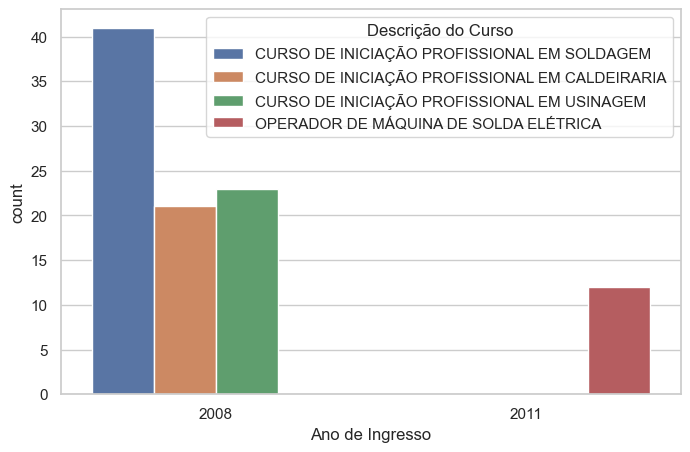

In [36]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Descrição do Curso')
plt.show()

# Raça

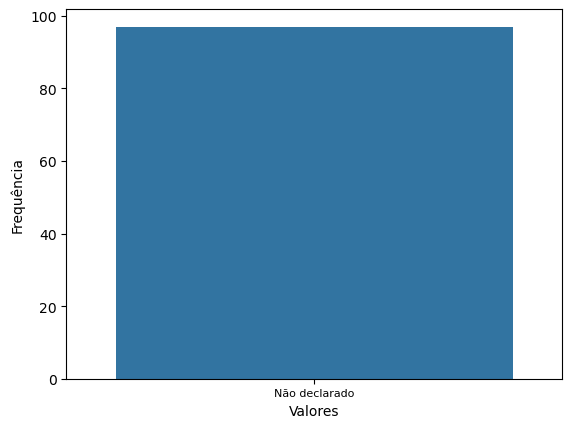

In [12]:
# A primeira informação buscada na análise foi relacionada com raça/etnia/cor, no primeiro gráfico
# é possível observar a quantidade de alunos de cada raça/etnia/cor e também os que não declararam no campus Sertãozinho. 
# Podemos perceber graficamente que o número de brancos é alto em comparação com o restante.
sns.countplot(x = dados['Etnia/Raça/Cor'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

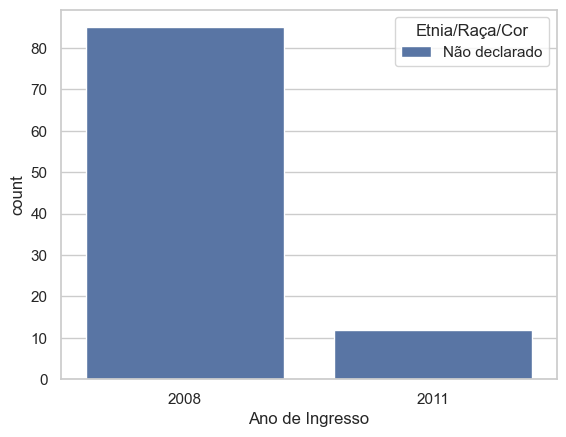

In [13]:
# Após analisarmos a quantidade bruta de alunos com relação a raça/cor/etnia, agora podemos analisar no gráfico 
# a quantidade através dos anos, é possível notar que até dois mil e quinze o alunos quase não se declaravam, após esse ano é possível
# ver que há um aumento significativo no nos alunos se declarando e uma clara diminuição nos que não se declaram.

sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Etnia/Raça/Cor')

plt.show()

In [14]:
dados['Etnia/Raça/Cor'].value_counts()

Não declarado    97
Name: Etnia/Raça/Cor, dtype: int64

# Tipo de escolaridade

<Axes: xlabel='Tipo de Escola de Origem', ylabel='count'>

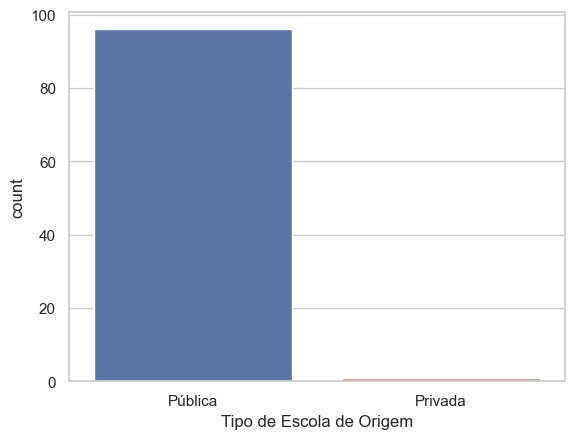

In [15]:
# Neste novo tópico será possivel analisar a escolaridade de origem dos alunos, sendo pública ou privada, uma informação 
# importante para os próximos passos do projeto. No gráfico a seguir existe uma diferença grande entre público e privado, com público sendo maior. 
sns.countplot(x = dados['Tipo de Escola de Origem'])

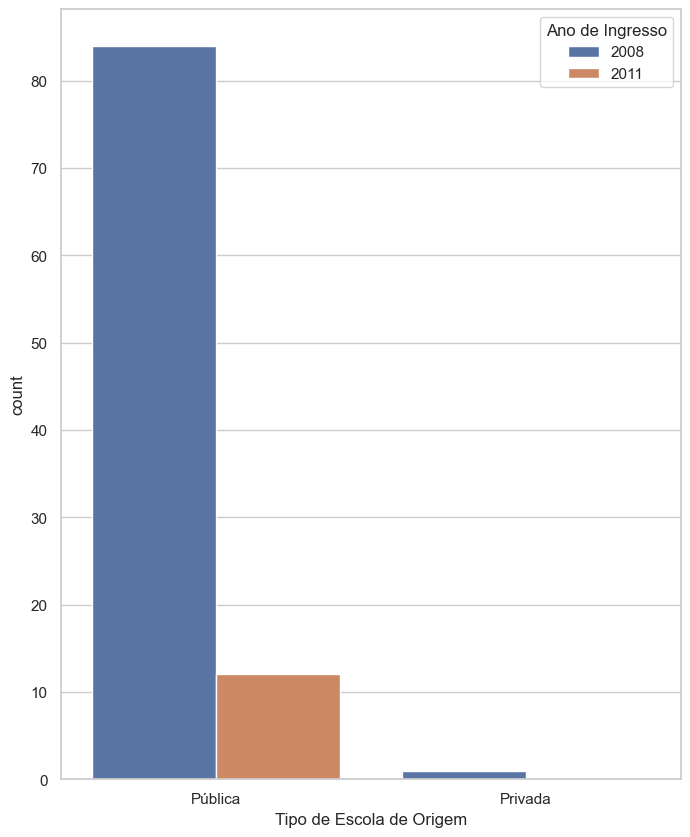

In [16]:
# No gráfico a seguir é possível ver o número de alunos e suas escolaridades de origem ao decorrer dos anos, é interessante analisar
# um aumento de ambas, pública e privada, nos anos de 2021 e 2022, anos de pandemia.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Tipo de Escola de Origem', hue='Ano de Ingresso')
plt.show()

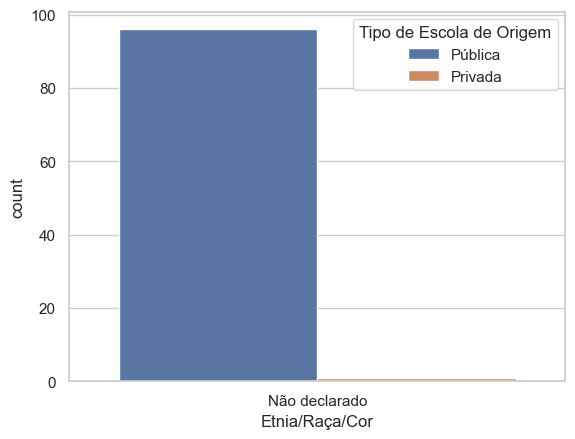

In [17]:
# Outra informação batante relevante para este estudo é mostrado no gráfico abaixo, onde existe uma disparidade alta entre 
# escolas de origem pública e privada, principalmente entre os alunos brancos.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Etnia/Raça/Cor', hue='Tipo de Escola de Origem')
plt.show()

In [18]:
dados['Descrição do Curso'].value_counts()

CURSO DE INICIAÇÃO PROFISSIONAL EM SOLDAGEM       41
CURSO DE INICIAÇÃO PROFISSIONAL EM USINAGEM       23
CURSO DE INICIAÇÃO PROFISSIONAL EM CALDEIRARIA    21
OPERADOR DE MÁQUINA DE SOLDA ELÉTRICA             12
Name: Descrição do Curso, dtype: int64

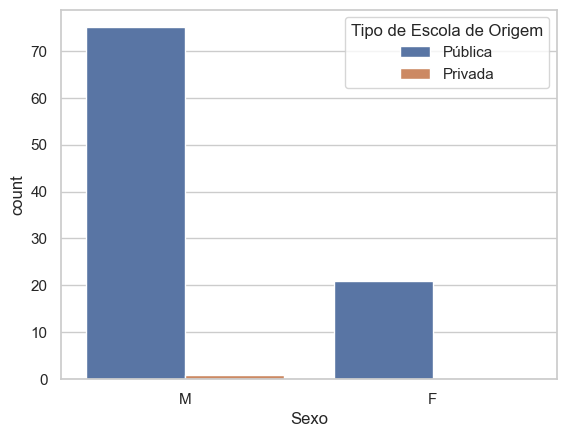

In [19]:
# Nas próximas conclusões que foram possíveis tirar a partir do gráfico abaixo, vemos a diferença entre
# o número de alunos de gênero masculino e feminino com relção a escola de origem, sendo bem perceptível um equilibrio.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Tipo de Escola de Origem')
plt.show()

# Gênero

<Axes: xlabel='Sexo', ylabel='count'>

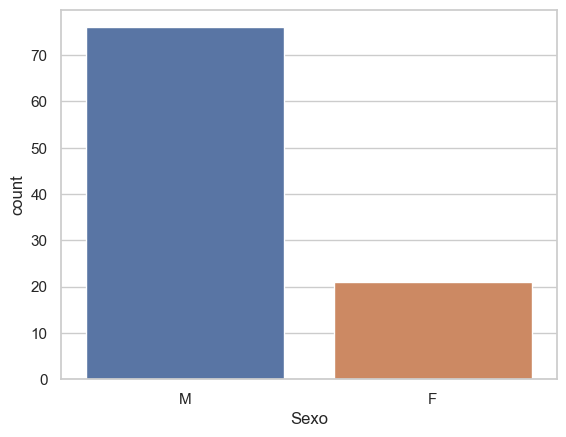

In [20]:
# Agora será feita uma ánalise sobre questões de gênero. Primeiro o gráfico a seguir mostra um equilíbrio entre o número geral de 
# homens e mulheres no campus. Um adendo importante é que os dados se resumem apenas a gênero masculino e feminino. 
sns.countplot(x = dados['Sexo'])

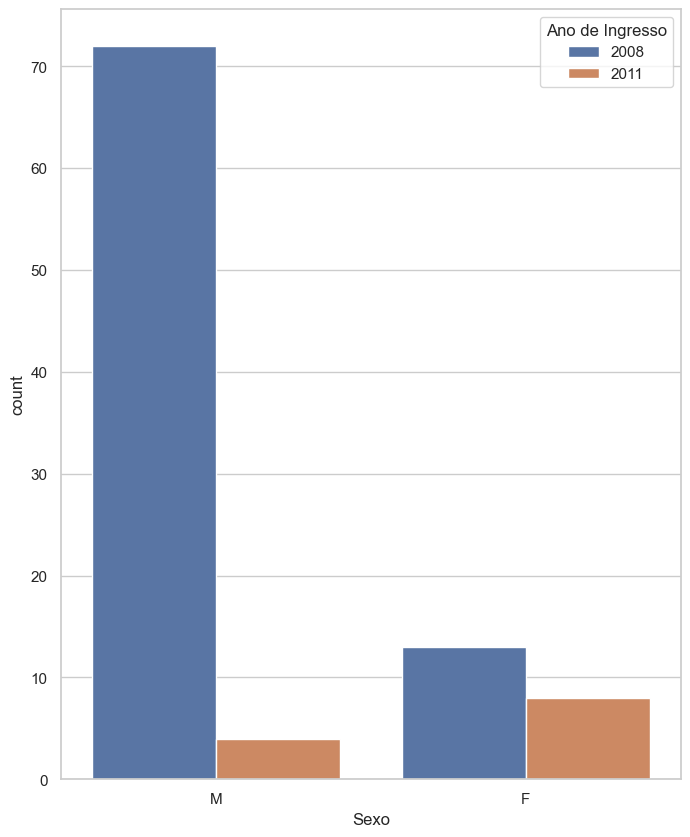

In [21]:
# É possível concluir a partir do próximo gráfico e dos anteriores também, um aumente relevante de alunos, de ambos os gêneros 
# analisados, nos anos de pandemia, pricnipalamente para mulheres no ano de dois mil e vinte um.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Ano de Ingresso')
plt.show()

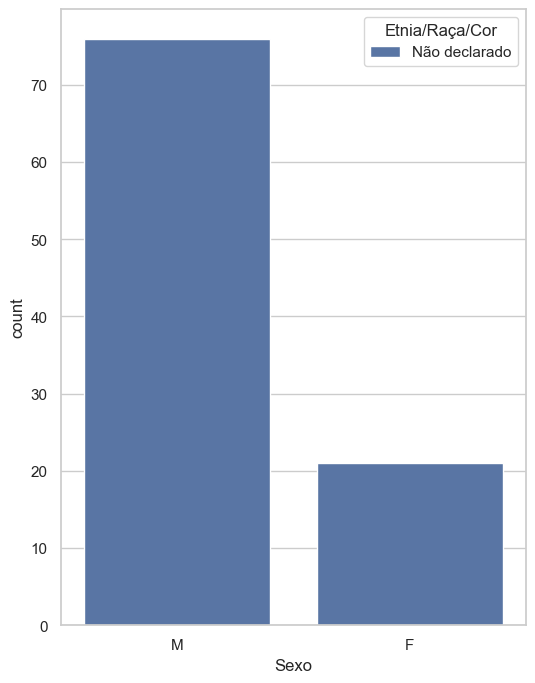

In [22]:
# Com relação a raça, o gráfico a seguir mostra, assim como analisado anteriormente, um grande número de alunos brancos e seguidos 
# por alunos pardos com uma certa distância.
plt.figure(figsize= (6,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Etnia/Raça/Cor')
plt.show()

# Evasão

In [23]:
dados['Situação no Curso'].value_counts()

Concluído      60
Matriculado    29
Cancelado       8
Name: Situação no Curso, dtype: int64

In [24]:
dados_Evas = dados[dados['Situação no Curso']=='Cancelado']

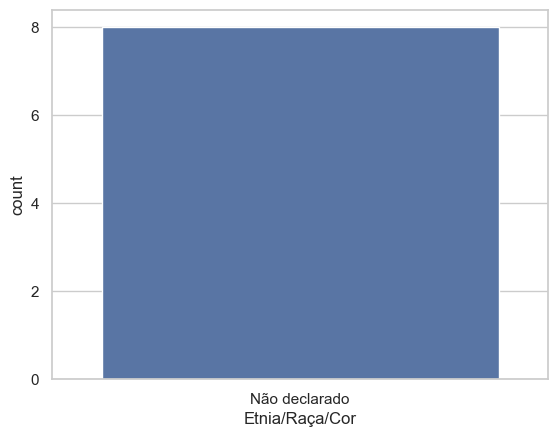

In [25]:
# O tópico de evasão é um dos mais importantes do projeto, nele pode-se observar algumas informações que serão muito importante para as 
# conclusões, no gráfico a seguir foi filtrado uma base de dados só com os alunos que evadiram em relação a raça/etnia/cor.
sns.countplot(x = dados_Evas['Etnia/Raça/Cor'])
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 15

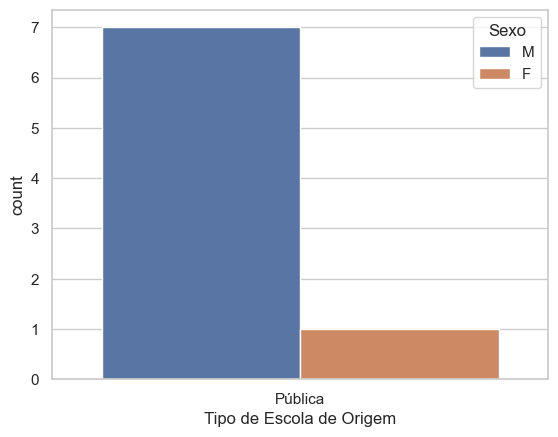

In [26]:
# Agora a análise de evasão é feita pela escola de origem e gênero, é possível perceber um alto número de alunos de origem de escola pública e
# homens que evadem mais. 
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Tipo de Escola de Origem', hue='Sexo')
plt.show()

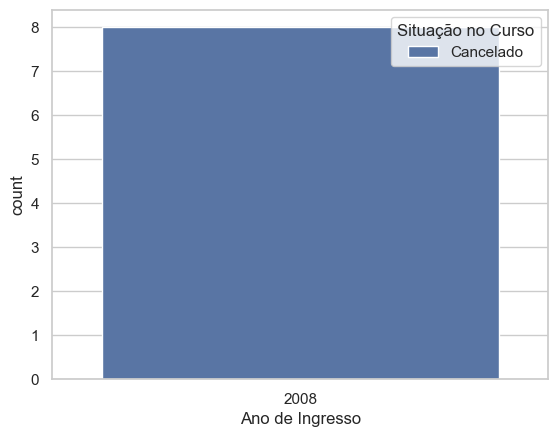

In [27]:
# Agora será analisado o número geral de evadidos, em todos os cursos e modalidades do campus, ao passar dos anos, 
# peecebendo um ápice em dois mil e dezoito e uma queda nos anos de pandemia, dois mil e vinte e vinte um.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Ano de Ingresso', hue='Situação no Curso')
plt.show()

In [28]:
dados['Descrição do Curso'].value_counts()

CURSO DE INICIAÇÃO PROFISSIONAL EM SOLDAGEM       41
CURSO DE INICIAÇÃO PROFISSIONAL EM USINAGEM       23
CURSO DE INICIAÇÃO PROFISSIONAL EM CALDEIRARIA    21
OPERADOR DE MÁQUINA DE SOLDA ELÉTRICA             12
Name: Descrição do Curso, dtype: int64

# Deficiência

In [29]:
dados_Def = dados[dados['Deficiência']=='PCD']

In [30]:
dados['Deficiência'].value_counts()

Sem Necessidade Especial    97
Name: Deficiência, dtype: int64

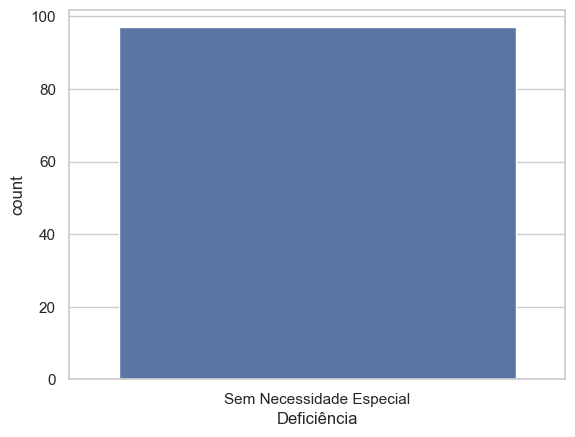

In [31]:
# O tópico de pessoas com deficiêcia (PCD) é importante para analisarmos o avanço do número geral desses alunos no campus 
# e muito importante para mostrar os avanços de acessibilidade do campus. No gráfico a seguir podemos ver a comparação de alunos PCD com alunos
# sem necessidades especiais.
sns.countplot(x = dados['Deficiência'])
plt.rcParams['xtick.labelsize'] = 8

In [32]:
# Não possuem dados sobre pessoas PCD nesta análise
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Ano de Ingresso', hue='Deficiência')
plt.show()

ValueError: min() arg is an empty sequence

In [ ]:
dados_Def['Ano de Ingresso'].value_counts()

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Deficiência', hue='Ano de Ingresso')
plt.show()

In [ ]:
plt.figure(figsize= (7,12))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Deficiência', hue='Ano de Ingresso')
plt.show()

# Regras de Associação

In [ ]:
!pip install apyori

In [ ]:
import pandas as pd
from apyori import apriori


In [ ]:
dados_Evas = dados_Evas.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [ ]:
dados_Evas = dados_Evas.drop(["Renda Per Capita"],axis = 1)

In [ ]:
dados_Evas

In [ ]:
dados_Evas.shape

In [ ]:
dados.shape

In [ ]:
Lista = []
for i in range(len(dados_Evas)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Evas.values[i, j]) for j in range(dados_Evas.shape[1])])

In [ ]:
# 
regras = apriori(Lista, min_support = 0.13, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

In [ ]:
resultados

In [ ]:
dados_Form = dados.loc[dados['Situação no Curso'] == "Concluído"]

In [ ]:
dados_Form = dados_Form.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [ ]:
dados_Form = dados_Form.drop(["Renda Per Capita"],axis = 1)

In [ ]:
dados_Form

In [ ]:
Lista = []
for i in range(len(dados_Form)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Form.values[i, j]) for j in range(dados_Form.shape[1])])

In [ ]:
regras = apriori(Lista, min_support = 0.08, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

In [ ]:
resultados